# ME405 Lab 0x02
### Plotting and Discussion

##### Max Gardenswartz and Jonathan Lam

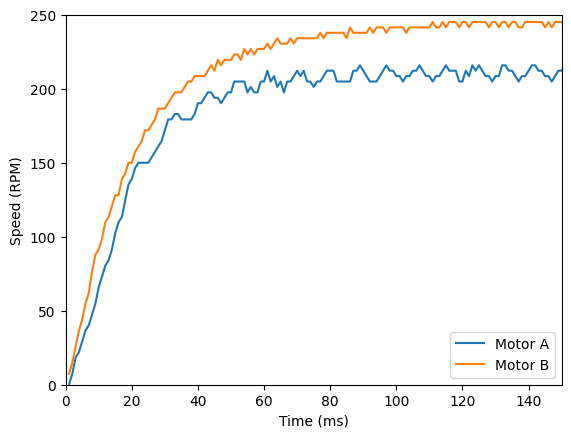

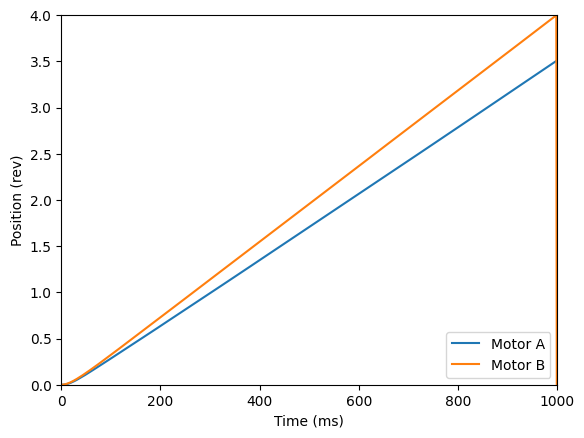

Motor A's motor constant is 18.61583333333333 RPM/V.
Motor B's motor constant is 20.7525 RPM/V.


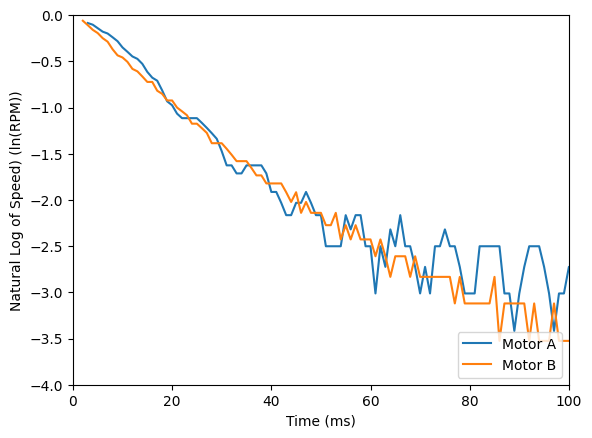

In [1]:
# def csvread(filename)
# Imports
from matplotlib import pyplot
import math as m

def csvread(filename):

    # Create an empty list.
    filedata = []

    # Read the data as fast as possible.
    with open(filename, 'r') as csvfile:
        for line in csvfile:
            filedata.append(line)

    # Grab the title
    titles = filedata[0]
    # Split into a list of two titles.
    titles = titles.split(',')
    # Strip the titles.
    for idx,element in enumerate(titles):
        titles[idx] = element.strip()
    # Delete more than two columns of titles.
    del titles[2:]
    # Delete the titles from the filedata
    filedata = filedata[1:]

    # Remove all whitespace
    for idx,element in enumerate(filedata):
        filedata[idx] = element.strip()
    
    # Split into a list of lists.   
    for idx,element in enumerate(filedata):
        filedata[idx] = filedata[idx].split(',')

    # Remove third or more columns.
    for row_index,row in enumerate(filedata):
        filedata[row_index] = row[:2] 

    # Remove comments
    for row_index,row in enumerate(filedata):
        # Remove comments
        for column_index,value in enumerate(row):
            temp = ""
            for char in value:
                try:
                    if char == "#":
                        break
                    # Allowable characters
                    elif (char.isdigit() == True or char=="-" or char=="."):
                        temp += char
                except AttributeError: 
                    filedata[row_index] == [""]
            # Rewrite the comment-removed data back to filedata.
            filedata[row_index][column_index] = temp

    # Remove non-numbers.
    for row_index,row in enumerate(filedata):
        for column_index,value in enumerate(element):
            try:
                float(value)
            except ValueError:
                # Remove that line from the filedata
                filedata[row_index] == [""]

    # Remove blank rows
    for idx,element in enumerate(filedata):
        for item in element:
            if item == '':
                del filedata[idx]   

    # Remove rows that have a blank entry
    for idx,element in enumerate(filedata):
        for cell,item in enumerate(element):
            if item == '':
                del filedata[idx]   
            
    # Remove blank rows.
    for row_index,row in enumerate(filedata):
        if row == [""]:
            del filedata[row_index]
    
    # Prepare deliverables
    x_values = []
    y_values = []
    for row in filedata:
        x_values.append(float(row[0]))
        y_values.append(float(row[1]))

    return x_values,y_values,titles

At,Av,titleA = csvread("MotorA_Speed.csv")
Bt,Bv,titleB = csvread("MotorB_Speed.csv")

# Plot velocity.
pyplot.plot(At,Av)
pyplot.plot(Bt,Bv)
pyplot.xlim((0,150))
pyplot.ylabel('Speed (RPM)')
pyplot.xlabel('Time (ms)')
pyplot.legend(['Motor A', 'Motor B'],loc='lower right')
pyplot.ylim((0,250))
pyplot.savefig("speed.png")
pyplot.show()

At,Ax,titleA = csvread("MotorA_pos.csv")
Bt,Bx,titleB = csvread("MotorB_pos.csv")

# Plot position.
Ax = [x/16384 for x in Ax] #deg
Bx = [y/16384 for y in Bx] #deg

pyplot.plot(At,Ax)
pyplot.plot(Bt,Bx)
pyplot.ylabel('Position (rev)') 
pyplot.xlabel('Time (ms)')
pyplot.legend(['Motor A', 'Motor B'],loc='lower right')
pyplot.xlim((0,1000))
pyplot.ylim((0,4))
pyplot.savefig("pos.png")
pyplot.show()

# Motor Voltage
A_vf = 223.39
B_vf = 249.03
Voltage = 12
MotorConstantA = A_vf/Voltage
MotorConstantB = B_vf/Voltage
print("Motor A's motor constant is",MotorConstantA,"RPM/V.")
print("Motor B's motor constant is",MotorConstantB,"RPM/V.")
Av = [m.log(1-x/A_vf) for x in Av]
Bv = [m.log(1-x/B_vf) for x in Bv]

# Plot linearized
At = At[3:]
Bt = Bt[2:]
Bv = Bv[1:]
Av = Av[2:]
pyplot.plot(At,Av)
pyplot.plot(Bt,Bv)
pyplot.ylabel('Natural Log of Speed) (ln(RPM))') 
pyplot.xlabel('Time (ms)')
pyplot.legend(['Motor A', 'Motor B'],loc='lower right')
pyplot.xlim((0,100))
pyplot.ylim((-4,0))
pyplot.savefig("log.png")

1.	Consider the amount of inertia and friction in the system. Is all the friction linear viscous friction as we would hope for a good step response?
  ###### a.	No, in a small DC motor system, not all the friction is linear viscous friction. There are other sources of friction like static friction and kinetic friction, which can be nonlinear and vary depending on the conditions of the motor and its components (e.g. temperature). These non-linear frictional forces can affect the motor's step response and may lead to deviations from the ideal behavior.
2.	How would (or does) Coulomb friction affect the plot results?
  ###### a.	Static friction requires an activating threshold of torque to overcome. Once exceeded, the shaft (inertia) will start moving suddenly. This can lead to abrupt changes in position, which might appear as jumps or discontinuities on the speed vs. time graph, which our motors appears to have more noticeably than the other, as shown above.
3.	Comment on the sample rate of the system and its time constant. How fast should you sample a system relative to its time constant?
  ###### a.	Our sample rate is 1000 Hz. The time constant of the graph is about 20 ms. Motor A's was a little lower than this. The system is sampled every 1 ms. This is good because it gives enough resolution on the encoder to see a somewhat smooth step response, but not too much to generate an inordinate amount of redundant data. The Nyquist criteria states that the time constant should be at least twice the sample period. This criteria is exceeded by a factor of 10.
4.	When we close the loop in the next lab using a feedback control system, how fast should we run the controller?
  ###### a.	The closed loop time constant will be less than the open loop time constant, but the time constant already exceeds the sample period by a factor of 20. The time constant will not change significantly enough to change this ratio to fail the Nyquist critieria, so 1000 Hz should still suffice.
5.	When we get to the term project and you have a lot of hardware attached to your motors, how will the performance change? Will this affect the rate at which your control loop or data collection must run?
 ###### a. We may have to reduce the frequency of the control loop when our microcontroller becomes busier running a lot of code in a way that still qualifies as cooperative multitasking. However, as long as the Nyquist criteria is still met, we should be fine. 
